# Tutorial 5: Modeling for Time Resolved, Temperature-Jump SAXS Data Analysis

**Package Information:**<br>
Currently the [tr_tjump_saxs](https://github.com/ScientistAsh/tr_tjump_saxs/ "tr_tjump_saxs package") package only works through the Python3 command line. The full dependencies can be found on the [GitHub Page](https://github.com/ScientistAsh/tr_tjump_saxs/issues "tr_tjump_saxs"). The data analysis can be executed from an interactive Python command line such as ipython or Jupyter or the code can be written in a script to run in a non-interactive mode. The preferred usage is in Jupyter Lab as this is the environment the package was developed in. Jupyter also provides a file where all code and output of code and notes can be contained in a single file and serves a record of the data analysis performed, the code used to conduct the data analysis, and the output of the analysis. 

**Tutorial Information:**<br>
This set of tutorial notebooks will cover how to use the `tr_tjump_saxs` package to analyze TR, T-Jump SAXS data. This package contains multiple modules, each containing a set of functions to accomplish a specific subtask of the TR, T-Jump SAXS data analysis workflow. Many of the functions are modular and some can be helpful for analyzing static SAXS and other data sets as well. 

**Package Modules:**<br>
> 1. `file_handling`<br>
> 2. `saxs_processing`<br>
> 3. `saxs_qc`<br>
> 4. `saxs_kinetics`<br>
> 5. `saxs_modeling`<br>

**Developer:** [@ScientistAsh](https://github.com/ScientistAsh "ScientistAsh GitHub")

**Updated:** 13 November 2023

## Tutorial 5 Introduction
In this Tutorial 5 notebook, I introduce the `saxs_modeling` module from the `tr_tjump_saxs` package. The `saxs_modeling` module provides functions that will calculate theoretical SAXS curves from atomic models and pair distance distributions curves from either theoretical or experimental SAXS curves. Please note that this module is a work in progress and not all functions have been added to this module at this time. Updates to this functions module will be made in the future. If you find any issues with this tutorial, please create an issue on the repository GitHub page ([tr_tjump_saxs](https://github.com/ScientistAsh/tr_tjump_saxs/issues "tr_tjump_saxs Issues")). 

### Module functions:
> 1. `delta_pr()` calculates the difference between 2 input pair distance distribution curves. <br>

### Tutorial Files:
The data used for these tutorials can be found at: 

*COMING SOON*

## How to Use Jupyter Notebooks
You can execute the code directly in this notebook or create your own notebook and copy the code there. 

<div class="alert alert-block alert-info">
    
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Tips</b><br>
    
    <b>1.</b> To run the currently highlighted cell, hit the <code>shift</code> and <code>enter</code> keys at the same time.<br>
    <b>2</b>. To get help with a specific function, place the cursor in the functions brackets and hit the <code>shift</code> and <code>tab</code> keys at the same time.

</div>

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-star" aria-hidden="true"></i>&nbsp; In the Literature</b><br>
    
    Our <a href="https://www.biorxiv.org/content/10.1101/2023.05.17.541130v1">recent paper </a> on BioArxiv provides an example of the type of data, the analysis procedure, and example output for this type of data analysis.  <br> 
    
    <p style="text-align:center">
       
    <img src="bioarxiv_qr_web-Copy1.png" width="100" align="center">
    
</div>

## Step 1: Import Modules

In order to use the `saxs_modeling` module, the `tr_tjump_saxs` package needs to be imported. The dependecies will automatically be imported with the package import.

In [1]:
# import sys to allow python to use the file browser to find files
import sys

# append the path for the tr_tjump_saxs_analysis package to the PYTHONPATH
sys.path.append(r'/datacommons/dhvi-md/AshleyB/tr_tjump_saxs_analysis/')

# import CH505TF_SAXS analysis dependent packages and custom functions
from file_handling import *
from saxs_processing import *
from saxs_qc import *
from saxs_kinetics import *
from saxs_modeling import *

<div class="alert alert-block alert-info">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Tips</b><br>
    Be sure that the path for the <code>tr_tjump_saxs</code> package appended to the <code>PYTHONPATH</code> matches the path to the repository on your machine.
    </div>

## SAXS Modeling Overview
There are many options for how to model SAXS data and the best approach will be dictated by the molcule of interest and the specific questions involved. Structures can be estimated from the SAXS curves and/or SAXS curves can be calculated from structural models. This notebook tutorial will cover the modeling pipeline we used to study [HIV-1 Envelope Glycoprotein structural dynamics](https://www.biorxiv.org/content/10.1101/2023.05.17.541130v1).

The overview of our SAXS modeling pipeline is shown in [Figure 1](#Figure-1). To deterimine an all-atom model of the HIV-1 Env associated with the TR, T-Jump SAXS curves in out recent pre-print we chose to **build models** of Env in known structural states and calculate the theoretical SAXS curves for each model. We used the software [Modeller](https://salilab.org/modeller/ "Modeller") to build homology models using cryo-EM structures as templates. We then used the [FoXS server](https://modbase.compbio.ucsf.edu/foxs/ "FoXS Server") to **calculate the theoretical scattering curves** from, the atomic models. Alternatively, [CRYSOL from the ATSAS Software Suite](https://www.embl-hamburg.de/biosaxs/software.html "CRYSOL from the ATSAS Software Suite") can be used to calculate theoretical scattering curves from the atomic models. CRYSOL offers the advantage that it can be run from the command line and thus can be automated over multiple structures at once. Once the scattering curves for the models are calculated, these **theoretical scattering curves can be fit or matched to experimental static SAXS scattering curves**.

Additionally, **pair distance distributions** can be calulcated from both the experimental and theoretical curves using the [ATSAS Software Suite](https://www.embl-hamburg.de/biosaxs/software.html "ATSAS Software Suite"). This distribution is the Fourier transform of the scattering intensity and indicates the pairwise distances contributing to the scattering curves. It is helpful to compare the theoretical pair distance distributions with the experimental pair distance distributions when fitting the theoretical SAXS curves to the experimental SAXS cuvres. 

To relate the atomic models fit to the static SAXS data to TR, T-Jump SAXS curves, **difference curves** need to be determined. The TR, T-Jump SAXS data contains signal indicating movement in the protein. To determine what structural transition is associated with the TR, T-Jump SAXS signal we calculated the difference between theoretical curves from 2 different models and compare to the extracted SVD/REGALS signals determined from the kinetic analysis. To associated pair wise distances involved with these transitions, we calculate the **pair distance distribution differences**. 

Currently, the `saxs_modeling` module only includes the function to calculate pair distance distribution differences. But more functions to handle more of the modeling pipeline will be added in the future. 

<a id='Figure-1'></a>

<img src="modeling_workflow.png" alt="SAXS modeling workflow" width="800" align="center">

**Figure 1:** SAXS Modeling Workflow


## Step 2: Calculate Pair Distance Distribution Difference
The `tr_tjump_saxs` package uses an interpolation method to calculate the difference between two given pair distance distribution functions. This interpolation is needed becaue two different pair distance distribution functions do no necessarily have the same x-values and therefore interpolation is required to calculate the difference. 

The `delta_pr()` function will perform this analysis. `delta_pr()` has 2 require input parameters and some additional parameters for user control. The `curve1` and `curve1` are the only required parameters and indicate the data arrays containing the pair distance distributions to determine the difference for. The difference is calculated as `curve - curve1`. The `delim1` and `delim2` parameters indicate the delimiter used in the files for `curve` and `curve2`, respectively. `skip1` and `skip2` indicate the numberof rows to skip when loading `curve1` and `curve2`, respectively. The `kind` parameter indicates the interpolation method to be used. The options for this can be found in the [SciPy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html). The `fill_value` parameter indicates the method to use for filling in missing values. The options for this setting come from the [SciPy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html). The `outfile` parameter indicates if an output file is saved and if so the path and name for the file. The default value for `outfile` is None, which will not save any output data.  

### Step 2.1: Load Pair Distance Distribution Curves into Data Arrays
The files have headers and other data in them so we skip the first 216 or 212 rows for the closed and occluded pair distance distributions, respectively. 

In [8]:
closed = np.loadtxt('/datacommons/dhvi-md/TR_T-jump_SAXS_July2022/MODELS/3CLOSED/PDDF/CH505TF_Closed-Man9_pr2.out', skiprows=216)
occluded = np.loadtxt('/datacommons/dhvi-md/TR_T-jump_SAXS_July2022/MODELS/3OPEN_OCCLUDED/PDDF/CH505TF_3OpenOccluded_Man9_pr.out', skiprows=212)

### Step 2.2: Calculate Pair Distance Distribution Difference
Now that we have the pair distance distributions loaded into numpy arrays, we can calculate the differece. For our modelling we use the closed structure as the reference and subtract this closed pair distance distribution from the occluded pair distance distribution. This pair distance distribution difference corresponds to the HIV-1 Env glycoprotein transition from the closed to the occluded structures.  

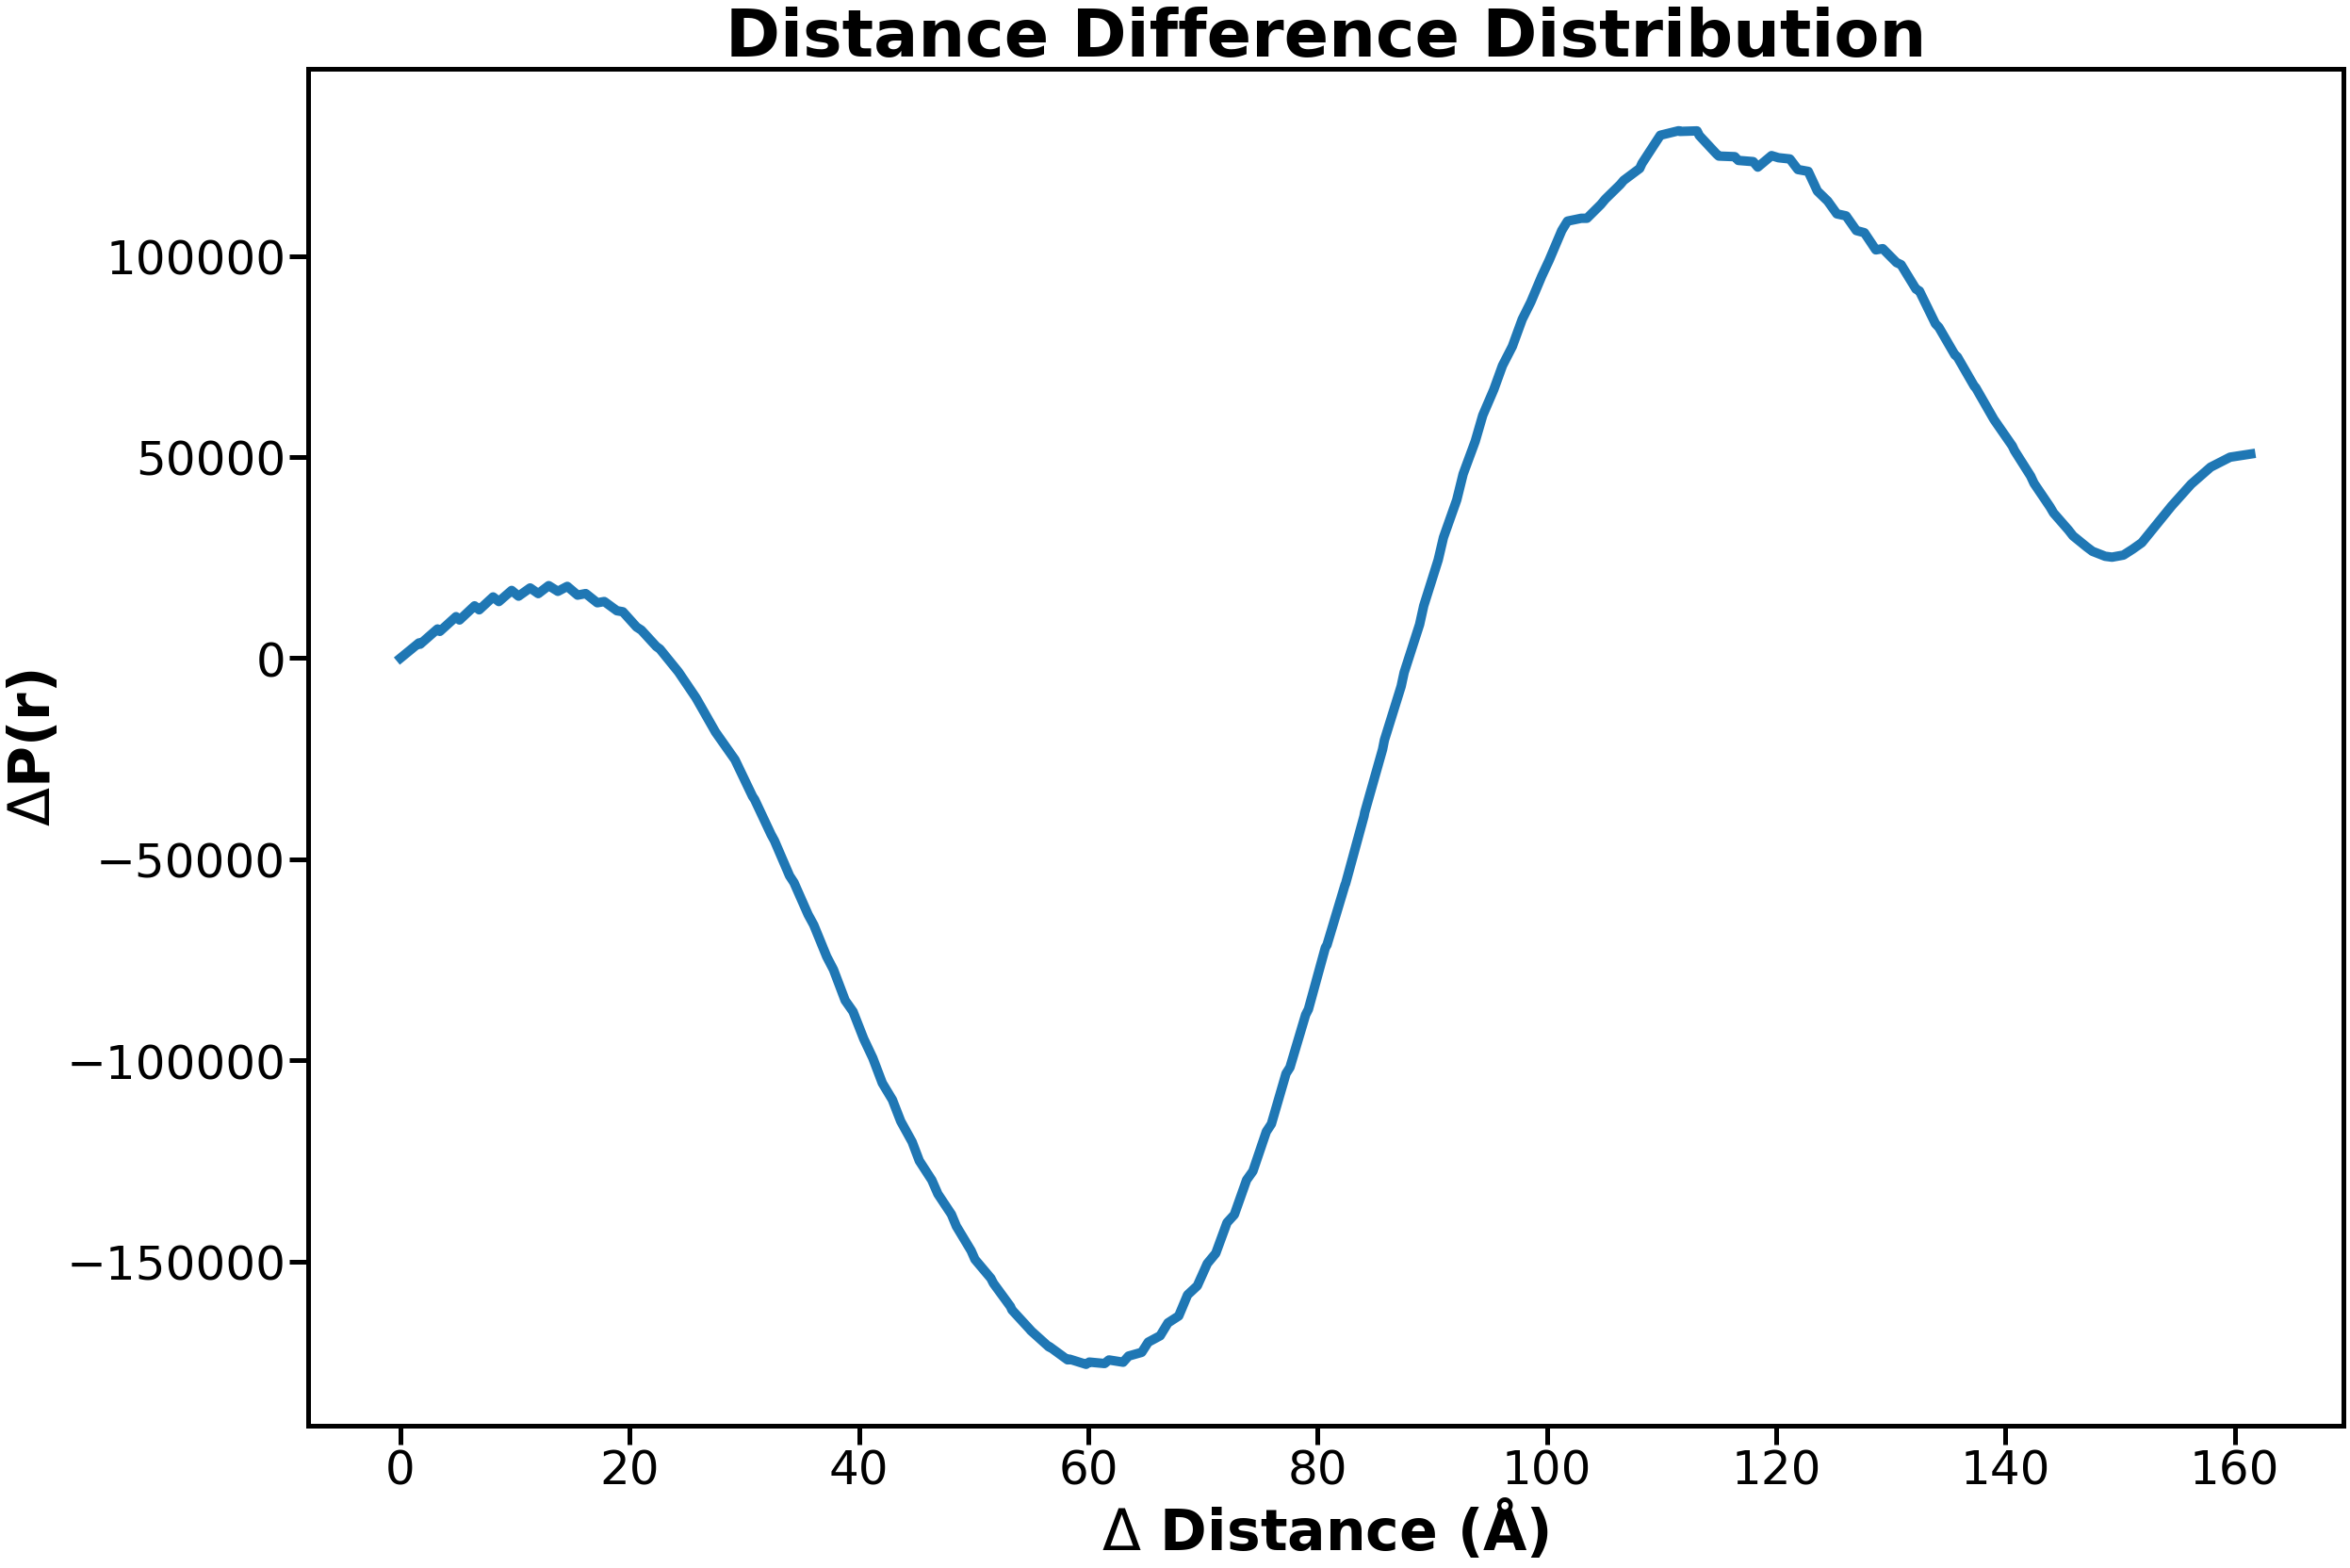

In [9]:
dpr = delta_pr(curve1=occluded, curve2=closed, delim1=None, delim2=None, skip1=212, skip2=216, 
               kind='linear', fill_value='extrapolate', 
               outfile=None)

<div class="alert alert-block alert-warning">
    
    <i class="fa fa-exclamation-triangle"></i>&nbsp; <b>Module Incomplete</b><br>
    Currently, this <code>saxs_modeling</code> module is not complete with all the needed functions for modeling SAXS data. Other software currently exists for these functions and was sued for the publication of our HIV-1 Env glycoprotein manuscript. We released the code as it was used for the published analysis. However, more functions will be added in the future to provide a more thorough and automated workflow for SAXS modeling analyses. 

<div class="alert alert-block alert-success">
    
    <i class="fa fa-check-circle"></i>&nbsp; <b>Congratulations!</b><br>
    You completed the last tutorial. You are now ready for your own TR, T-Jump SAXS experiments!  
    </div>